<a href="https://colab.research.google.com/github/shakeeluetp1041/Machine-Learning/blob/main/CricleClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

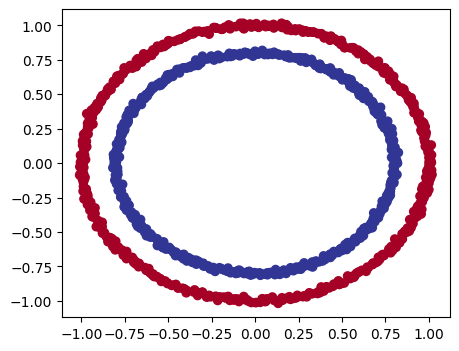

In [1]:
import torch
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torch import nn
import numpy as np

Data,label=datasets.make_circles(n_samples=1000, shuffle=True, noise=0.01, random_state=None, factor=0.8)
plt.figure(figsize=(5,4))
plt.scatter(Data[:,0],Data[:,1],c=label,cmap='RdYlBu')
device='cuda' if torch.cuda.is_available() else 'cpu'
X=torch.from_numpy(Data).type(torch.float32)
y=torch.from_numpy(label).type(torch.float32)
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, train_size=0.8, random_state=42, shuffle=True, stratify=None)
y_train=y_train.unsqueeze(dim=1)
y_test=y_test.unsqueeze(dim=1)

def accuracy_fn(true_label,predicted_labels):
  num_correct=torch.eq(true_label,predicted_labels).sum().item()
  acc=(num_correct/len(true_label))*100
  return acc

class CircleClassification(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1=nn.Linear(in_features=2,out_features=20);
    self.relu1=nn.ReLU();
    self.linear2=nn.Linear(in_features=20,out_features=1);
    self.sigmoid1=nn.Sigmoid()
  def forward (self,x:torch.Tensor):
    return self.sigmoid1(self.linear2(self.relu1(self.linear1(x)))) # For BCELoss()
    # return self.linear2(self.relu1(self.linear1(x))) # For BCEWithLogitsLoss()

torch.manual_seed(42)
model=CircleClassification().to(device)
loss_fn=nn.BCELoss()
# loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.1)
epochs=1000
for epoch in range(epochs):
  model.train()
  y_train_preds=model(X_train.to(device))
  train_loss=loss_fn(y_train_preds,y_train)
  train_acc=accuracy_fn(true_label=y_train,predicted_labels=torch.round(y_train_preds))
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()
  model.eval()
  with torch.inference_mode():
    y_test_preds=model(X_test.to(device))
    test_loss=loss_fn(y_test_preds,y_test)
    test_acc=accuracy_fn(true_label=y_test,predicted_labels=torch.round(y_test_preds))

  if epoch % 200==0:
    print(f'EPOCHS:{epoch} | Train Loss: {train_loss:0.4f}|Train Acc: {train_acc:0.3f} | Test Loss: {test_loss:0.4f}| Test Acc: {test_acc:0.3f}')
